## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [33]:
import seaborn as sns
import matplotlib as plt
import pandas as pd

**0. Load seaborn dataset "tips"**

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [28]:
tips.shape

(244, 7)

In [31]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

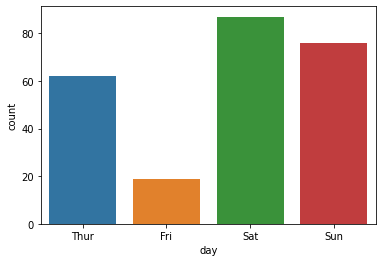

In [4]:
sns.countplot(x=tips.day)

In [5]:
print("The preferend day for eating is Saturday")

The preferend day for eating is Saturday


**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

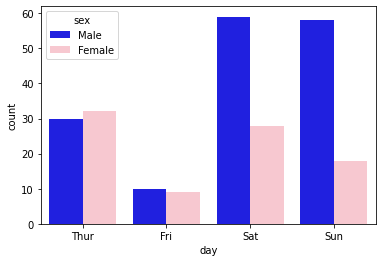

In [7]:
sns.countplot(x=tips.day, hue=tips.sex, palette = ("blue","pink"))

In [8]:
print ("Friday, Saturday and Sunday have more men than women payers")

Friday, Saturday and Sunday have more men than women payers


**3. Do you think bill amounts change considerably depending on smoking?**

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

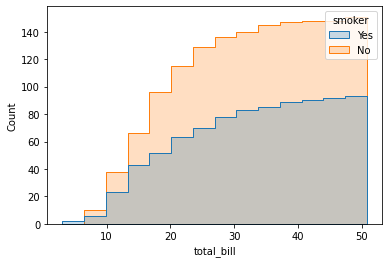

In [15]:
sns.histplot(x=tips.total_bill, hue=tips.smoker, element="step", cumulative=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

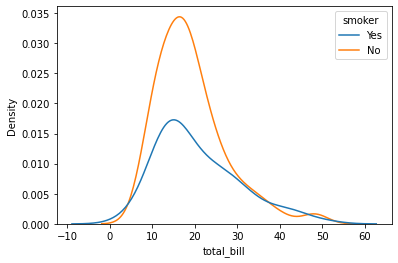

In [10]:
sns.kdeplot(x=tips.total_bill, hue=tips.smoker)

In [20]:
print("Yes, non-smoker people spend more in the bill")

Yes, non-smoker people spend more in the bill


**4. Is tip correlated to total_bill? Draw a scatter plot**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

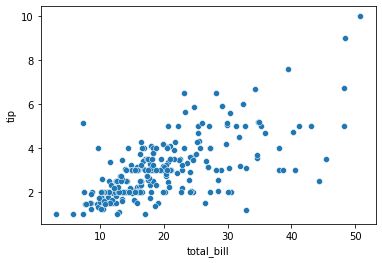

In [21]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

In [18]:
print("Yes, the bill amounts seems to have some correlaction. Bigger the bill is, bigger the tip is.")

Yes, the bill amounts seems to have some correlaction. Bigger the bill is, bigger the tip is.


**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

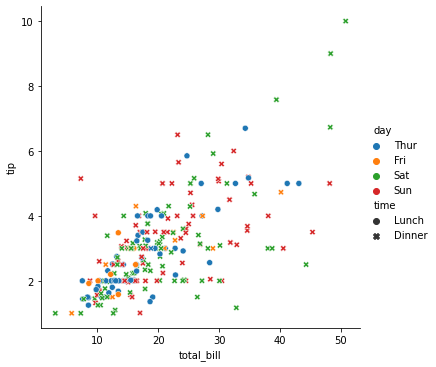

In [30]:
sns.relplot(x="total_bill", y="tip", hue="day", style="time", data=tips)

In [26]:
print("I think is not useful because there is too much information")

I think is not useful because there is too much information
